In [2]:
from sklearn.externals import joblib


C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
auto = joblib.load(r'E:\와이앤슈\NIDS\데이터셋\본선이후\A_total_normal_12.pkl')


In [21]:
import pandas as pd

In [54]:
# normal = pd.read_csv(r'D:\본선데이터셋\feature21_final\A_attack_fea19.csv')
# attack = pd.read_csv(r'D:\본선데이터셋\feature21_final\A_normal_fea19.csv')

data = pd.read_csv(r'E:\와이앤슈\NIDS\데이터셋\본선이후\A_test2_fea12.csv')

In [55]:
data.columns

Index(['SET', 'fl_dur', 'tot_fw_pk', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_std',
       'fw_iat_max', 'fw_iat_min', 'fw_pkt_s', 'is_in_bot', 'is_in_ares',
       'check_rdp', 'tcp.srcport', 'tcp.dstport', 'ip.src', 'ip.dst',
       'SET2_dst', 'SET2_src', 'src.num', 'dst.num', 'ratio'],
      dtype='object')

In [56]:
data = data[['SET', 'fl_dur', 'tot_fw_pk', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_std','fw_iat_max', 'fw_iat_min', 'fw_pkt_s','is_in_bot', 'is_in_ares','check_rdp', 'ratio','ip.src', 'ip.dst']]

In [57]:
data.columns

Index(['SET', 'fl_dur', 'tot_fw_pk', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_std',
       'fw_iat_max', 'fw_iat_min', 'fw_pkt_s', 'is_in_bot', 'is_in_ares',
       'check_rdp', 'ratio', 'ip.src', 'ip.dst'],
      dtype='object')

In [67]:
test_set = data

In [106]:
test_set.columns[1:13]

Index(['fl_dur', 'tot_fw_pk', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_std',
       'fw_iat_max', 'fw_iat_min', 'fw_pkt_s', 'is_in_bot', 'is_in_ares',
       'check_rdp', 'ratio'],
      dtype='object')

In [107]:

X_test = test_set[test_set.columns[1:13]]
# Y_test = test_set['label']

In [108]:
from sklearn.preprocessing import StandardScaler
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [109]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.399684,-0.009336,-0.399684,-0.153799,-0.150600,-0.123920,-0.262541,-0.133422,0.0,-0.130919,0.0,-0.551446
1,-0.405390,-0.009481,-0.405390,-0.153720,-0.161421,-0.130875,-0.262574,-0.133422,0.0,-0.130919,0.0,-0.551446
2,-0.405403,-0.009481,-0.405403,-0.153720,-0.161435,-0.130884,-0.262575,-0.133422,0.0,-0.130919,0.0,-0.551446
3,-0.405172,-0.009481,-0.405172,-0.153713,-0.161172,-0.130745,-0.262574,-0.133422,0.0,-0.130919,0.0,-0.551446
4,-0.405172,-0.009481,-0.405172,-0.153713,-0.161171,-0.130738,-0.262574,-0.133422,0.0,-0.130919,0.0,-0.551446
...,...,...,...,...,...,...,...,...,...,...,...,...
43672,-0.407435,-0.009481,-0.407435,-0.419523,-0.164216,-0.132135,-0.243099,-0.133422,0.0,-0.130919,0.0,0.677093
43673,-0.367292,-0.009772,-0.367292,-0.348397,-0.164753,-0.081981,3.645262,-0.166251,0.0,-0.130919,0.0,0.677093
43674,-0.407719,-0.009336,-0.407719,-0.349041,-0.164046,-0.132284,-0.262575,-0.122479,0.0,-0.130919,0.0,0.677093
43675,-0.278407,-0.009046,-0.278407,-0.345241,-0.017480,-0.033451,-0.261595,-0.133422,0.0,-0.130919,0.0,0.677093


In [ ]:
X_test[]

In [98]:
X_test[9] = X_test[9]*100

In [99]:
X_test[9].value_counts()

-13.091905     42941
 763.830806      736
Name: 9, dtype: int64

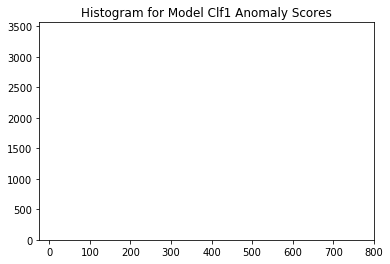

In [100]:
# Get the outlier scores for the train data
y_train_scores = auto.decision_scores_  

# Predict the anomaly scores
y_test_scores = auto.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [101]:
print(y_test_scores)

0        13.109777
1        13.110324
2        13.110325
3        13.110306
4        13.110306
           ...    
43672    13.115933
43673    13.606574
43674    13.114153
43675    13.105731
43676    13.127681
Length: 43677, dtype: float64


In [40]:
print(y_test_scores)

0        0.696585
1        0.706799
2        0.706819
3        0.706467
4        0.706465
           ...   
43672    0.804156
43673    3.709156
43674    0.774588
43675    0.615764
43676    0.977228
Length: 43677, dtype: float64


In [102]:
max(y_test_scores)

763.8314796100173

In [103]:
data['result'] = y_test_scores

In [105]:
data[data['result']>250]['ip.src'].value_counts()

205.174.165.73    736
Name: ip.src, dtype: int64

In [88]:
data[data['ip.src']=='205.174.165.73']

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,is_in_bot,is_in_ares,check_rdp,ratio,ip.src,ip.dst,result
20611,205.174.165.73_8080 192.168.10.14_51583.csv,0.087594,4,0.087594,48268.854904,0.039721,0.085368,0.000566,4,0,1,0,0.004425,205.174.165.73,192.168.10.14,76.387069
20612,205.174.165.73_8080 192.168.10.14_51584.csv,0.064997,4,0.064997,48278.932544,0.029211,0.062973,0.000580,4,0,1,0,0.004425,205.174.165.73,192.168.10.14,76.387059
20613,205.174.165.73_8080 192.168.10.14_51585.csv,0.123092,4,0.123092,48289.028273,0.056616,0.121096,0.000604,4,0,1,0,0.004425,205.174.165.73,192.168.10.14,76.387038
20614,205.174.165.73_8080 192.168.10.14_51586.csv,0.064001,4,0.064001,48299.124305,0.028705,0.061925,0.000604,4,0,1,0,0.004425,205.174.165.73,192.168.10.14,76.387034
20615,205.174.165.73_8080 192.168.10.14_51587.csv,0.201492,5,0.201492,48309.278747,0.086077,0.199460,0.000003,5,0,1,0,0.004425,205.174.165.73,192.168.10.14,76.386985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21951,205.174.165.73_8080 192.168.10.9_6939.csv,1.024714,3,1.024714,58888.343520,0.002499,0.514856,0.509858,2,0,0,0,0.004202,205.174.165.73,192.168.10.9,2.745502
21952,205.174.165.73_8080 192.168.10.9_6988.csv,1.000032,3,1.000032,58989.361816,0.000203,0.500219,0.499813,2,0,0,0,0.004202,205.174.165.73,192.168.10.9,2.767143
21953,205.174.165.73_8080 192.168.10.9_7008.csv,1.024491,3,1.024491,59090.383430,0.002685,0.514931,0.509560,2,0,0,0,0.004202,205.174.165.73,192.168.10.9,2.789381
21954,205.174.165.73_8080 192.168.10.9_7041.csv,1.000111,3,1.000111,59191.401338,0.000018,0.500074,0.500037,2,0,0,0,0.004202,205.174.165.73,192.168.10.9,2.811176


In [42]:
data['result'].value_counts()

0.864872    1
0.898489    1
0.617639    1
0.660442    1
1.836886    1
           ..
1.145404    1
0.562799    1
0.717696    1
1.222582    1
0.685902    1
Name: result, Length: 43677, dtype: int64

In [52]:
z = data[data['result']>7]
z[z['ip.src']=='205.174.165.73']

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,is_in_bot,is_in_ares,check_rdp,ip.src,ip.dst,result
20611,205.174.165.73_8080 192.168.10.14_51583.csv,0.087594,4,0.087594,48268.854904,0.039721,0.085368,0.000566,4,0,1,0,205.174.165.73,192.168.10.14,7.678161
20612,205.174.165.73_8080 192.168.10.14_51584.csv,0.064997,4,0.064997,48278.932544,0.029211,0.062973,0.000580,4,0,1,0,205.174.165.73,192.168.10.14,7.678064
20613,205.174.165.73_8080 192.168.10.14_51585.csv,0.123092,4,0.123092,48289.028273,0.056616,0.121096,0.000604,4,0,1,0,205.174.165.73,192.168.10.14,7.677854
20614,205.174.165.73_8080 192.168.10.14_51586.csv,0.064001,4,0.064001,48299.124305,0.028705,0.061925,0.000604,4,0,1,0,205.174.165.73,192.168.10.14,7.677810
20615,205.174.165.73_8080 192.168.10.14_51587.csv,0.201492,5,0.201492,48309.278747,0.086077,0.199460,0.000003,5,0,1,0,205.174.165.73,192.168.10.14,7.677329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21864,205.174.165.73_8080 192.168.10.9_4764.csv,0.067271,4,0.067271,50103.257851,0.029963,0.064793,0.000672,4,0,1,0,205.174.165.73,192.168.10.9,7.669038
21865,205.174.165.73_8080 192.168.10.9_4857.csv,0.070157,4,0.070157,50203.346896,0.031369,0.067743,0.000649,4,0,1,0,205.174.165.73,192.168.10.9,7.669358
21866,205.174.165.73_8080 192.168.10.9_4858.csv,0.072129,4,0.072129,50303.436705,0.032293,0.069708,0.000640,4,0,1,0,205.174.165.73,192.168.10.9,7.669765
21867,205.174.165.73_8080 192.168.10.9_4866.csv,0.063153,4,0.063153,50403.523517,0.028031,0.060687,0.000623,2,0,1,0,205.174.165.73,192.168.10.9,7.670684


In [53]:
z['ip.src'].value_counts()

205.174.165.73    736
162.125.4.6         6
172.217.12.206      5
13.107.4.50         5
172.217.11.46       5
                 ... 
65.52.108.206       1
178.172.160.4       1
104.24.11.111       1
184.84.243.199      1
104.24.28.35        1
Name: ip.src, Length: 119, dtype: int64

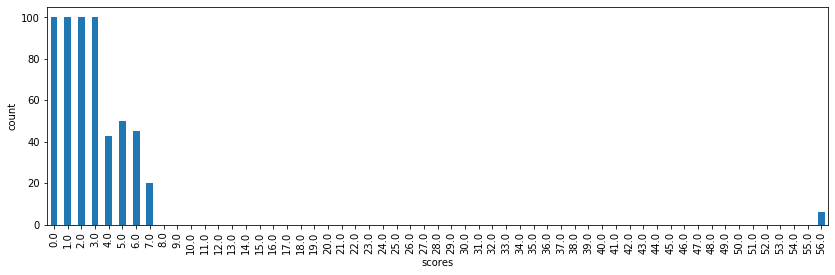

In [311]:
plt.figure(figsize=(14, 4))

count.plot.bar()
plt.xlabel('scores')
plt.ylabel('count')
# count.title('B_Network')
plt.show()

In [290]:
print(y_test_scores)

0       1.233866
1       1.233916
2       3.253128
3       3.241184
4       3.241109
          ...   
6163    1.621292
6164    1.571713
6165    1.620745
6166    1.621292
6167    0.993733
Length: 6168, dtype: float64


In [292]:
data[data['result']>50]

,SET,is_in_bot,is_in_ares,check_rdp,tcp.srcport,tcp.dstport,ratio,result
3977,207.46.13.202_7048 10.89.32.19_80.csv,1,0,0,7048,80,2.0,56.0
6118,66.249.71.34_60604 10.89.32.19_8080.csv,1,0,0,60604,8080,1.0,56.0


In [227]:
data['result'] = round(y_test_scores)

In [228]:
count = data['result'].value_counts()

In [229]:
count.index

Float64Index([1.0, 2.0, 3.0, 0.0, 5.0, 6.0, 4.0, 56.0], dtype='float64')

In [310]:
count[56.0] = 6

In [286]:
del count[120.0]

In [287]:
count

1.0     2716
2.0     2619
3.0      403
0.0      224
5.0      116
6.0       45
4.0       43
56.0       0
7.0        0
8.0        0
9.0        0
10.0       0
11.0       0
12.0       0
13.0       0
14.0       0
15.0       0
16.0       0
17.0       0
18.0       0
19.0       0
20.0       0
21.0       0
22.0       0
23.0       0
24.0       0
25.0       0
26.0       0
27.0       0
28.0       0
29.0       0
30.0       0
31.0       0
32.0       0
33.0       0
34.0       0
35.0       0
36.0       0
37.0       0
38.0       0
39.0       0
40.0       0
41.0       0
42.0       0
43.0       0
44.0       0
45.0       0
46.0       0
47.0       0
48.0       0
49.0       0
50.0       0
51.0       0
52.0       0
53.0       0
54.0       0
55.0       0
Name: result, dtype: int64

In [288]:
count = count.sort_index()

In [152]:
type(count)

pandas.core.series.Series

In [86]:
len(set(round(y_test_scores,2)))

267

In [29]:
max_score = max(y_test_scores)

In [30]:
min_score = min(y_test_scores)

In [31]:
max_score, min_score

(37.38314208657696, 0.16626359179010375)

In [38]:
data['result'] = y_test_scores

In [46]:
a = data[data['result']>4.5]
a['ip.src'].value_counts()

205.174.165.73    736
185.170.48.239     42
172.16.0.1         11
77.238.121.220      4
52.8.53.244         1
Name: ip.src, dtype: int64

In [41]:
data[data['ip.src']=='205.174.165.73']

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,is_in_bot,...,tcp.srcport,tcp.dstport,ip.src,ip.dst,SET2_dst,SET2_src,src.num,dst.num,ratio,result
20611,205.174.165.73_8080 192.168.10.14_51583.csv,0.087594,4,0.087594,48268.854904,0.039721,0.085368,0.000566,4,0,...,8080,51583,205.174.165.73,192.168.10.14,51583205.174.165.73192.168.10.14,8080205.174.165.73192.168.10.14,1,226,0.004425,8.543001
20612,205.174.165.73_8080 192.168.10.14_51584.csv,0.064997,4,0.064997,48278.932544,0.029211,0.062973,0.000580,4,0,...,8080,51584,205.174.165.73,192.168.10.14,51584205.174.165.73192.168.10.14,8080205.174.165.73192.168.10.14,1,226,0.004425,8.543005
20613,205.174.165.73_8080 192.168.10.14_51585.csv,0.123092,4,0.123092,48289.028273,0.056616,0.121096,0.000604,4,0,...,8080,51585,205.174.165.73,192.168.10.14,51585205.174.165.73192.168.10.14,8080205.174.165.73192.168.10.14,1,226,0.004425,8.543008
20614,205.174.165.73_8080 192.168.10.14_51586.csv,0.064001,4,0.064001,48299.124305,0.028705,0.061925,0.000604,4,0,...,8080,51586,205.174.165.73,192.168.10.14,51586205.174.165.73192.168.10.14,8080205.174.165.73192.168.10.14,1,226,0.004425,8.543012
20615,205.174.165.73_8080 192.168.10.14_51587.csv,0.201492,5,0.201492,48309.278747,0.086077,0.199460,0.000003,5,0,...,8080,51587,205.174.165.73,192.168.10.14,51587205.174.165.73192.168.10.14,8080205.174.165.73192.168.10.14,1,226,0.004425,8.543016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21951,205.174.165.73_8080 192.168.10.9_6939.csv,1.024714,3,1.024714,58888.343520,0.002499,0.514856,0.509858,2,0,...,8080,6939,205.174.165.73,192.168.10.9,6939205.174.165.73192.168.10.9,8080205.174.165.73192.168.10.9,1,238,0.004202,4.150538
21952,205.174.165.73_8080 192.168.10.9_6988.csv,1.000032,3,1.000032,58989.361816,0.000203,0.500219,0.499813,2,0,...,8080,6988,205.174.165.73,192.168.10.9,6988205.174.165.73192.168.10.9,8080205.174.165.73192.168.10.9,1,238,0.004202,4.149499
21953,205.174.165.73_8080 192.168.10.9_7008.csv,1.024491,3,1.024491,59090.383430,0.002685,0.514931,0.509560,2,0,...,8080,7008,205.174.165.73,192.168.10.9,7008205.174.165.73192.168.10.9,8080205.174.165.73192.168.10.9,1,238,0.004202,4.149076
21954,205.174.165.73_8080 192.168.10.9_7041.csv,1.000111,3,1.000111,59191.401338,0.000018,0.500074,0.500037,2,0,...,8080,7041,205.174.165.73,192.168.10.9,7041205.174.165.73192.168.10.9,8080205.174.165.73192.168.10.9,1,238,0.004202,4.148377


In [47]:
data[data['result'] == max_score]

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,is_in_bot,...,tcp.srcport,tcp.dstport,ip.src,ip.dst,SET2_dst,SET2_src,src.num,dst.num,ratio,result
9037,172.16.0.1_40628 192.168.10.50_80.csv,5.019072,7,5.019072,57961.471774,1.844676,4.961201,0.00002,6,0,...,40628,80,172.16.0.1,192.168.10.50,80172.16.0.1192.168.10.50,40628172.16.0.1192.168.10.50,11,1,11.0,37.383142


In [48]:
del data['SET2_dst']
del data['SET2_src']
del data['fl_dur']
del data['']

In [49]:
data[data['result'] == max_score]

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,is_in_bot,is_in_ares,check_rdp,tcp.srcport,tcp.dstport,ip.src,ip.dst,src.num,dst.num,ratio,result
9037,172.16.0.1_40628 192.168.10.50_80.csv,5.019072,7,5.019072,57961.471774,1.844676,4.961201,0.00002,6,0,0,0,40628,80,172.16.0.1,192.168.10.50,11,1,11.0,37.383142


In [55]:
b = data[data['result']>8]
# b['ip.src'].value_counts()
b.to_csv(r'E:\와이앤슈\NIDS\데이터셋\본선이후\result8_feature7.csv', index=False)

In [43]:
data[data['result']>9]['ip.src'].value_counts()

185.170.48.239     34
172.16.0.1         11
162.125.4.6         6
172.217.11.46       5
172.217.10.238      4
                   ..
23.15.4.10          1
54.172.218.169      1
104.16.100.29       1
178.239.182.230     1
23.194.142.125      1
Name: ip.src, Length: 99, dtype: int64

In [20]:
test.columns

Index(['SET', 'fl_dur', 'tot_fw_pk', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_std',
       'fw_iat_max', 'fw_iat_min', 'fw_pkt_s', 'label', 'tcp.srcport',
       'tcp.dstport', 'ip.src', 'ip.dst', 'SET2_dst', 'SET2_src', 'src.num',
       'dst.num', 'ratio', 'result'],
      dtype='object')

In [41]:
result = data[['SET','ip.src', 'ip.dst','tcp.srcport', 'tcp.dstport','result']]

In [42]:
result

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,1.212.23.67_51294 10.89.32.47_443.csv,1.212.23.67,10.89.32.47,51294,443,1.547499
1,1.212.23.67_51295 10.89.32.47_443.csv,1.212.23.67,10.89.32.47,51295,443,1.413600
2,1.214.162.114_1086 10.89.32.47_443.csv,1.214.162.114,10.89.32.47,1086,443,12.067637
3,1.214.162.114_1246 10.89.32.47_443.csv,1.214.162.114,10.89.32.47,1246,443,12.065887
4,1.214.162.114_1247 10.89.32.47_443.csv,1.214.162.114,10.89.32.47,1247,443,13.432887
...,...,...,...,...,...,...
6163,93.174.93.136_57142 10.89.32.79_8908.csv,93.174.93.136,10.89.32.79,57142,8908,2.613184
6164,93.174.93.136_57142 10.89.32.93_6666.csv,93.174.93.136,10.89.32.93,57142,6666,2.299868
6165,93.174.93.136_57142 10.89.32.93_8888.csv,93.174.93.136,10.89.32.93,57142,8888,2.374909
6166,93.174.93.136_57142 10.89.32.93_8908.csv,93.174.93.136,10.89.32.93,57142,8908,2.534311


In [44]:
a = result[result['result']>4.5]
a['ip.src'].value_counts()

185.176.27.170     191
222.106.53.85       17
106.240.26.26       15
211.197.167.172     13
218.158.36.146      12
                  ... 
14.52.31.1           1
221.163.90.119       1
106.242.193.146      1
112.220.98.19        1
121.141.144.73       1
Name: ip.src, Length: 104, dtype: int64

In [46]:
data[data['ip.src']=='185.176.27.170']

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,check_rdp,...,tcp.dstport,ip.src,ip.dst,SET2_dst,SET2_src,src.num,dst.num,ratio,bot,result
3153,185.176.27.170_45739 10.89.32.0_30912.csv,0.0,1,0.0,28486.127732,-1.0,-1.0,-1.0,1,0,...,30912,185.176.27.170,10.89.32.0,30912185.176.27.17010.89.32.0,45739185.176.27.17010.89.32.0,1,3,0.333333,0,3.014918
3154,185.176.27.170_45739 10.89.32.0_50314.csv,0.0,1,0.0,28211.618596,-1.0,-1.0,-1.0,1,0,...,50314,185.176.27.170,10.89.32.0,50314185.176.27.17010.89.32.0,45739185.176.27.17010.89.32.0,1,3,0.333333,0,4.665392
3155,185.176.27.170_45739 10.89.32.0_65278.csv,0.0,1,0.0,28394.135904,-1.0,-1.0,-1.0,1,0,...,65278,185.176.27.170,10.89.32.0,65278185.176.27.17010.89.32.0,45739185.176.27.17010.89.32.0,1,3,0.333333,0,5.799801
3156,185.176.27.170_45739 10.89.32.101_21361.csv,0.0,1,0.0,28517.596705,-1.0,-1.0,-1.0,1,0,...,21361,185.176.27.170,10.89.32.101,21361185.176.27.17010.89.32.101,45739185.176.27.17010.89.32.101,1,3,0.333333,0,2.437991
3157,185.176.27.170_45739 10.89.32.101_3387.csv,0.0,1,0.0,28524.277631,-1.0,-1.0,-1.0,1,0,...,3387,185.176.27.170,10.89.32.101,3387185.176.27.17010.89.32.101,45739185.176.27.17010.89.32.101,1,3,0.333333,0,1.848974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,185.176.27.170_45739 10.89.32.9_26770.csv,0.0,1,0.0,28488.540167,-1.0,-1.0,-1.0,1,0,...,26770,185.176.27.170,10.89.32.9,26770185.176.27.17010.89.32.9,45739185.176.27.17010.89.32.9,1,5,0.200000,0,2.719375
3778,185.176.27.170_45739 10.89.32.9_31434.csv,0.0,1,0.0,28512.230010,-1.0,-1.0,-1.0,1,0,...,31434,185.176.27.170,10.89.32.9,31434185.176.27.17010.89.32.9,45739185.176.27.17010.89.32.9,1,5,0.200000,0,3.106990
3779,185.176.27.170_45739 10.89.32.9_38208.csv,0.0,1,0.0,28498.041417,-1.0,-1.0,-1.0,1,0,...,38208,185.176.27.170,10.89.32.9,38208185.176.27.17010.89.32.9,45739185.176.27.17010.89.32.9,1,5,0.200000,0,3.598289
3780,185.176.27.170_45739 10.89.32.9_50314.csv,0.0,1,0.0,28255.809186,-1.0,-1.0,-1.0,1,0,...,50314,185.176.27.170,10.89.32.9,50314185.176.27.17010.89.32.9,45739185.176.27.17010.89.32.9,1,5,0.200000,0,4.593124


In [27]:
attack1 = result[result['ip.src'] == "172.16.0.1"][['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport']]
attack1.to_csv("1721601.csv", index = False)

In [31]:
a = result[result['ip.src'] == "205.174.165.73"]

In [39]:
result[result['result']>2]

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1_32784 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1_32798 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1_32802 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1_32812 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1_32822 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32822,80,5.977576
...,...,...,...,...,...,...
90575,98.158.106.130_443 192.168.10.17_37647.csv,98.158.106.130,192.168.10.17,443,37647,2.560149
90576,98.158.106.130_443 192.168.10.17_37648.csv,98.158.106.130,192.168.10.17,443,37648,2.532825
90577,99.192.248.32_80 192.168.10.14_59701.csv,99.192.248.32,192.168.10.14,80,59701,2.511375
90578,99.192.248.32_80 192.168.10.14_59702.csv,99.192.248.32,192.168.10.14,80,59702,2.513619


In [41]:
del result['SET']

In [42]:
result

,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1,192.168.10.50,32822,80,5.977576
...,...,...,...,...,...
90592,99.192.248.32,192.168.10.8,80,2216,1.280760
90593,99.192.248.32,192.168.10.8,80,2217,1.038833
90594,99.192.248.32,192.168.10.8,80,2218,1.036066
90595,99.192.248.32,192.168.10.8,80,2243,1.036141


In [54]:
attack172 = result[result['result']>5]

In [57]:
attack172

,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1,192.168.10.50,32822,80,5.977576
...,...,...,...,...,...
88446,89.186.73.156,192.168.10.15,443,58433,5.610747
88447,89.186.73.156,192.168.10.15,443,58681,5.610832
88858,91.232.230.50,192.168.10.12,443,49204,65.708756
88860,91.232.230.50,192.168.10.12,443,49210,40.639546


In [58]:
a

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
2076,205.174.165.73_444 192.168.10.8_1260.csv,205.174.165.73,192.168.10.8,444,1260,174.035122
2077,205.174.165.73_444 192.168.10.8_53966.csv,205.174.165.73,192.168.10.8,444,53966,10.404256
2078,205.174.165.73_444 192.168.10.8_54119.csv,205.174.165.73,192.168.10.8,444,54119,67.380050
2079,205.174.165.73_444 192.168.10.8_54122.csv,205.174.165.73,192.168.10.8,444,54122,11.407412
2080,205.174.165.73_444 192.168.10.8_54131.csv,205.174.165.73,192.168.10.8,444,54131,47.663855
2081,205.174.165.73_444 192.168.10.8_54573.csv,205.174.165.73,192.168.10.8,444,54573,38.533395
45172,205.174.165.73_444 192.168.10.25_51325.csv,205.174.165.73,192.168.10.25,444,51325,9.654858
45173,205.174.165.73_444 192.168.10.25_52118.csv,205.174.165.73,192.168.10.25,444,52118,9.935502
45174,205.174.165.73_444 192.168.10.25_52139.csv,205.174.165.73,192.168.10.25,444,52139,10.469607
45175,205.174.165.73_444 192.168.10.25_52160.csv,205.174.165.73,192.168.10.25,444,52160,10.146299


In [59]:
del a['SET']

In [60]:
attack1 = pd.concat([attack172,a])
attack1

,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1,192.168.10.50,32822,80,5.977576
...,...,...,...,...,...
45202,205.174.165.73,192.168.10.8,444,54131,7.055683
45203,205.174.165.73,192.168.10.8,444,54573,7.056358
45204,205.174.165.73,192.168.10.9,444,6246,6.308645
45205,205.174.165.73,192.168.10.9,444,6339,6.356984


In [61]:
attack1.to_csv('attack.csv', index=False)

In [52]:
result[result['result']>5]

,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1,192.168.10.50,32822,80,5.977576
...,...,...,...,...,...
88446,89.186.73.156,192.168.10.15,443,58433,5.610747
88447,89.186.73.156,192.168.10.15,443,58681,5.610832
88858,91.232.230.50,192.168.10.12,443,49204,65.708756
88860,91.232.230.50,192.168.10.12,443,49210,40.639546


In [48]:
result[result['result']>7]

,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
48,172.16.0.1,192.168.10.50,33310,80,27.577618
64,172.16.0.1,192.168.10.50,33486,80,27.628800
84,172.16.0.1,192.168.10.50,33702,80,27.686670
134,172.16.0.1,192.168.10.50,34252,80,27.847165
137,172.16.0.1,192.168.10.50,34292,80,27.856935
...,...,...,...,...,...
85746,74.125.192.156,192.168.10.8,443,50321,10.709018
87669,81.222.128.229,192.168.10.19,443,35160,9.435811
88858,91.232.230.50,192.168.10.12,443,49204,65.708756
88860,91.232.230.50,192.168.10.12,443,49210,40.639546


In [34]:
a['result'] = a['result']*12

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
a

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
2076,205.174.165.73_444 192.168.10.8_1260.csv,205.174.165.73,192.168.10.8,444,1260,174.035122
2077,205.174.165.73_444 192.168.10.8_53966.csv,205.174.165.73,192.168.10.8,444,53966,10.404256
2078,205.174.165.73_444 192.168.10.8_54119.csv,205.174.165.73,192.168.10.8,444,54119,67.380050
2079,205.174.165.73_444 192.168.10.8_54122.csv,205.174.165.73,192.168.10.8,444,54122,11.407412
2080,205.174.165.73_444 192.168.10.8_54131.csv,205.174.165.73,192.168.10.8,444,54131,47.663855
2081,205.174.165.73_444 192.168.10.8_54573.csv,205.174.165.73,192.168.10.8,444,54573,38.533395
45172,205.174.165.73_444 192.168.10.25_51325.csv,205.174.165.73,192.168.10.25,444,51325,9.654858
45173,205.174.165.73_444 192.168.10.25_52118.csv,205.174.165.73,192.168.10.25,444,52118,9.935502
45174,205.174.165.73_444 192.168.10.25_52139.csv,205.174.165.73,192.168.10.25,444,52139,10.469607
45175,205.174.165.73_444 192.168.10.25_52160.csv,205.174.165.73,192.168.10.25,444,52160,10.146299


In [30]:
attack2 = a[['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport']]
attack2.to_csv("20517416573.csv", index = False)

In [31]:
b = a[a['ip.dst'] == "192.168.10.15"]

In [32]:
b

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
20837,205.174.165.73_8080 192.168.10.15_51930.csv,205.174.165.73,192.168.10.15,8080,51930,4.0
20838,205.174.165.73_8080 192.168.10.15_51956.csv,205.174.165.73,192.168.10.15,8080,51956,4.0
20839,205.174.165.73_8080 192.168.10.15_52040.csv,205.174.165.73,192.168.10.15,8080,52040,4.0
20840,205.174.165.73_8080 192.168.10.15_52093.csv,205.174.165.73,192.168.10.15,8080,52093,4.0
20841,205.174.165.73_8080 192.168.10.15_52125.csv,205.174.165.73,192.168.10.15,8080,52125,4.0
...,...,...,...,...,...,...
21226,205.174.165.73_8080 192.168.10.15_54395.csv,205.174.165.73,192.168.10.15,8080,54395,5.0
21227,205.174.165.73_8080 192.168.10.15_54398.csv,205.174.165.73,192.168.10.15,8080,54398,5.0
21228,205.174.165.73_8080 192.168.10.15_54399.csv,205.174.165.73,192.168.10.15,8080,54399,5.0
21229,205.174.165.73_8080 192.168.10.15_54428.csv,205.174.165.73,192.168.10.15,8080,54428,5.0


In [33]:
len(b['tcp.dstport'].value_counts())

394

In [36]:
result1 = result[result['result'] > 5]

In [37]:
result1

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1_32784 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1_32798 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1_32802 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1_32812 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1_32822 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32822,80,5.977576
...,...,...,...,...,...,...
88446,89.186.73.156_443 192.168.10.15_58433.csv,89.186.73.156,192.168.10.15,443,58433,5.610747
88447,89.186.73.156_443 192.168.10.15_58681.csv,89.186.73.156,192.168.10.15,443,58681,5.610832
88858,91.232.230.50_443 192.168.10.12_49204.csv,91.232.230.50,192.168.10.12,443,49204,65.708756
88860,91.232.230.50_443 192.168.10.12_49210.csv,91.232.230.50,192.168.10.12,443,49210,40.639546


In [42]:
len(result1['tcp.dstport'].value_counts())

1175

In [25]:
result1['ip.dst'].value_counts()

192.168.10.50    2084
192.168.10.51    1263
192.168.10.15     513
192.168.10.14     494
192.168.10.8      488
192.168.10.9      479
192.168.10.16     413
192.168.10.5      410
192.168.10.12     406
192.168.10.17     401
192.168.10.19     363
192.168.10.25     273
Name: ip.dst, dtype: int64

In [ ]:
result1['tcp.']

In [38]:
result1['ip.src'].value_counts()

172.16.0.1        3057
172.217.10.142     204
172.217.10.110     153
104.16.26.216      106
172.217.10.14      104
                  ... 
23.194.108.108       1
125.212.247.52       1
159.127.42.76        1
104.97.141.192       1
104.85.5.19          1
Name: ip.src, Length: 584, dtype: int64

In [ ]:
result1[result1['ip.src'] == '172.16.0.1']

In [29]:
result1[(result1['ip.src'] == '172.16.0.1') & (result1['ip.dst'] == '192.168.10.50')]

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1_32784 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1_32798 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1_32802 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1_32812 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1_32822 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,32822,80,5.977576
...,...,...,...,...,...,...
17901,172.16.0.1_55794 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,55794,80,66.630064
18119,172.16.0.1_58238 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,58238,80,4.785241
18137,172.16.0.1_58440 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,58440,80,5.449359
18148,172.16.0.1_58564 192.168.10.50_80.csv,172.16.0.1,192.168.10.50,58564,80,4.629410


In [84]:
q = result1[result1['ip.src'] == "23.61.187.27"]

In [85]:
q

,SET,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
27988,23.61.187.27_80 192.168.10.12_54394.csv,23.61.187.27,192.168.10.12,80,54394,4.573586
28014,23.61.187.27_80 192.168.10.12_58314.csv,23.61.187.27,192.168.10.12,80,58314,4.719485
28123,23.61.187.27_80 192.168.10.15_50534.csv,23.61.187.27,192.168.10.15,80,50534,4.574930
28180,23.61.187.27_80 192.168.10.16_51542.csv,23.61.187.27,192.168.10.16,80,51542,4.541002
28214,23.61.187.27_80 192.168.10.16_56444.csv,23.61.187.27,192.168.10.16,80,56444,4.564122
28220,23.61.187.27_80 192.168.10.16_56644.csv,23.61.187.27,192.168.10.16,80,56644,4.605056
28223,23.61.187.27_80 192.168.10.16_57666.csv,23.61.187.27,192.168.10.16,80,57666,5.054254
28224,23.61.187.27_80 192.168.10.16_57668.csv,23.61.187.27,192.168.10.16,80,57668,5.054253
28233,23.61.187.27_80 192.168.10.16_57772.csv,23.61.187.27,192.168.10.16,80,57772,4.787452
28234,23.61.187.27_80 192.168.10.16_57774.csv,23.61.187.27,192.168.10.16,80,57774,4.787468


In [87]:
q[['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport']]

,ip.src,ip.dst,tcp.srcport,tcp.dstport
27988,23.61.187.27,192.168.10.12,80,54394
28014,23.61.187.27,192.168.10.12,80,58314
28123,23.61.187.27,192.168.10.15,80,50534
28180,23.61.187.27,192.168.10.16,80,51542
28214,23.61.187.27,192.168.10.16,80,56444
28220,23.61.187.27,192.168.10.16,80,56644
28223,23.61.187.27,192.168.10.16,80,57666
28224,23.61.187.27,192.168.10.16,80,57668
28233,23.61.187.27,192.168.10.16,80,57772
28234,23.61.187.27,192.168.10.16,80,57774


In [88]:
q.to_csv("23.61.187.27.csv", index = False)

In [71]:
q.to_csv("72.21.91.29.csv", index = False)

In [70]:
q['ip.dst'].value_counts()

192.168.10.9     32
192.168.10.8     21
192.168.10.5      8
192.168.10.15     7
192.168.10.19     5
192.168.10.12     4
192.168.10.14     3
192.168.10.17     2
192.168.10.16     2
Name: ip.dst, dtype: int64

In [ ]:
result1['i'].value_counts()

In [83]:
test[test['tcp.srcport'] == 443]

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,tcp.srcport,tcp.dstport,ip.src,ip.dst,SET2_dst,SET2_src,src.num,dst.num,ratio,result
24,1.31.173.11_443 192.168.10.25_51485.csv,46.529489,33,46.529489,51221.813247,7.785551,44.799482,2.000001e-06,20,443,51485,1.31.173.11,192.168.10.25,514851.31.173.11192.168.10.25,4431.31.173.11192.168.10.25,1,2,0.500000,1.065601
25,1.31.173.11_443 192.168.10.25_51486.csv,46.535114,24,46.535114,51223.842626,9.105315,44.726499,9.999931e-07,14,443,51486,1.31.173.11,192.168.10.25,514861.31.173.11192.168.10.25,4431.31.173.11192.168.10.25,1,2,0.500000,1.072890
26,1.31.173.21_443 192.168.10.25_51471.csv,50.833367,34,50.833367,51218.529777,8.080137,47.221030,2.000001e-06,12,443,51471,1.31.173.21,192.168.10.25,514711.31.173.21192.168.10.25,4431.31.173.21192.168.10.25,1,4,0.250000,0.834138
27,1.31.173.21_443 192.168.10.25_51472.csv,50.830033,41,50.830033,51218.428379,7.135590,45.785939,1.000000e-06,11,443,51472,1.31.173.21,192.168.10.25,514721.31.173.21192.168.10.25,4431.31.173.21192.168.10.25,1,4,0.250000,0.823437
28,1.31.173.21_443 192.168.10.25_51473.csv,50.824966,40,50.824966,51217.325306,7.453422,47.219968,1.000000e-06,18,443,51473,1.31.173.21,192.168.10.25,514731.31.173.21192.168.10.25,4431.31.173.21192.168.10.25,1,4,0.250000,0.829025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43652,98.139.225.43_443 192.168.10.8_1915.csv,15.444417,12,15.444417,46011.466417,3.105143,10.024042,4.000001e-06,8,443,1915,98.139.225.43,192.168.10.8,191598.139.225.43192.168.10.8,44398.139.225.43192.168.10.8,1,2,0.500000,2.345675
43653,98.139.225.43_443 192.168.10.8_1916.csv,0.176507,7,0.176507,46006.776771,0.034301,0.098067,4.799999e-05,7,443,1916,98.139.225.43,192.168.10.8,191698.139.225.43192.168.10.8,44398.139.225.43192.168.10.8,1,2,0.500000,2.390910
43654,98.139.225.43_443 192.168.10.9_5820.csv,15.698616,12,15.698616,53014.653331,3.077654,9.798391,3.000001e-06,8,443,5820,98.139.225.43,192.168.10.9,582098.139.225.43192.168.10.9,44398.139.225.43192.168.10.9,1,3,0.333333,2.021722
43655,98.139.225.43_443 192.168.10.9_5823.csv,15.252274,11,15.252274,53014.983285,3.209859,10.027220,4.900000e-05,7,443,5823,98.139.225.43,192.168.10.9,582398.139.225.43192.168.10.9,44398.139.225.43192.168.10.9,1,3,0.333333,2.022991


In [63]:
attack1.head()

,ip.src,ip.dst,tcp.srcport,tcp.dstport,result
0,172.16.0.1,192.168.10.50,32784,80,5.904265
1,172.16.0.1,192.168.10.50,32798,80,5.904912
2,172.16.0.1,192.168.10.50,32802,80,5.976721
3,172.16.0.1,192.168.10.50,32812,80,5.905562
4,172.16.0.1,192.168.10.50,32822,80,5.977576


In [64]:
del attack1['result']

In [65]:
attack1.drop_duplicates()

,ip.src,ip.dst,tcp.srcport,tcp.dstport
0,172.16.0.1,192.168.10.50,32784,80
1,172.16.0.1,192.168.10.50,32798,80
2,172.16.0.1,192.168.10.50,32802,80
3,172.16.0.1,192.168.10.50,32812,80
4,172.16.0.1,192.168.10.50,32822,80
...,...,...,...,...
45196,205.174.165.73,192.168.10.25,444,52611
45197,205.174.165.73,192.168.10.25,444,52632
45204,205.174.165.73,192.168.10.9,444,6246
45205,205.174.165.73,192.168.10.9,444,6339


In [74]:
test_data = pd.read_csv(r'E:\rnddata\원본\A_test1_1st.csv',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
merge1 = test_data.merge(attack1, on=['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport'], how = 'outer', suffixes=['','_'], indicator=True )

In [84]:
merge1['label'] = 0

In [93]:
merge1[merge1['_merge'] == 'both']['label'] = 1

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
merge1[merge1['_merge'] == 'left_only']['label'] = 0

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
merge1['_merge'].value_counts()

left_only     9120292
both           250327
right_only          0
Name: _merge, dtype: int64

In [94]:
merge2 = merge1[['_ws.col.UTCtime', '_ws.col.Protocol', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','http.request.uri', 'http.user_agent', '_merge']]

In [95]:
merge2.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,_merge
0,11:58:58.492265,CDP,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,11:59:02.261854,CDP,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,11:59:02.963151,CDP,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,11:59:05.720779,ARP,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,11:59:05.720785,ARP,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [101]:
a = merge2[merge2['_merge'] == 'left_only']

In [102]:
b = merge2[merge2['_merge'] == 'both']

In [103]:
a['label'] = 0
b['label'] = 1

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
a.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,_merge,label
0,11:58:58.492265,CDP,NaN,NaN,NaN,NaN,NaN,NaN,left_only,0
1,11:59:02.261854,CDP,NaN,NaN,NaN,NaN,NaN,NaN,left_only,0
2,11:59:02.963151,CDP,NaN,NaN,NaN,NaN,NaN,NaN,left_only,0
3,11:59:05.720779,ARP,NaN,NaN,NaN,NaN,NaN,NaN,left_only,0
4,11:59:05.720785,ARP,NaN,NaN,NaN,NaN,NaN,NaN,left_only,0


In [105]:
ab = pd.concat([a,b])

In [106]:
del ab['_merge']

In [107]:
ab.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
0,11:58:58.492265,CDP,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11:59:02.261854,CDP,NaN,NaN,NaN,NaN,NaN,NaN,0
2,11:59:02.963151,CDP,NaN,NaN,NaN,NaN,NaN,NaN,0
3,11:59:05.720779,ARP,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11:59:05.720785,ARP,NaN,NaN,NaN,NaN,NaN,NaN,0


In [108]:
ab['label'].value_counts()

0    9120292
1     250327
Name: label, dtype: int64

In [35]:
ab.shape

NameError: name 'ab' is not defined

In [111]:
ab.to_csv('result.csv', index=False)

In [34]:
ab['ip.src'].notnull

NameError: name 'ab' is not defined

In [87]:
merge1.columns

Index(['_ws.col.UTCtime', '_ws.col.Protocol', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq', 'tcp.ack',
       'udp.srcport', 'udp.dstport', 'udp.length', 'http.request.method',
       'http.request.uri', 'http.user_agent', 'http.connection', 'http.host',
       'http.response.code', 'http.server', 'http.content_type',
       'http.content_length', 'http.cache_control', '_merge', 'label'],
      dtype='object')

In [91]:
merge1['label'].value_counts()

0    9370619
Name: label, dtype: int64

In [69]:
merge1.columns

Index(['SET', 'fl_dur', 'tot_fw_pk', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_std',
       'fw_iat_max', 'fw_iat_min', 'fw_pkt_s', 'label', 'tcp.srcport',
       'tcp.dstport', 'ip.src', 'ip.dst', 'SET2_dst', 'SET2_src', 'src.num',
       'dst.num', 'ratio', 'result', '_merge'],
      dtype='object')

In [70]:
del merge1['SET']

In [71]:
del merge1['SET2_dst']
del merge1['SET2_src']
del merge1['dst.num']
del merge1['src.num']

In [72]:
merge1

,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,label,tcp.srcport,tcp.dstport,ip.src,ip.dst,ratio,result,_merge
0,5.709501,4,5.709501,48598.984858,2.690223,5.707717,8.690000e-04,2,1,32784,80,172.16.0.1,192.168.10.50,2053.000000,5.904265,both
1,5.709501,4,5.709501,48598.984858,2.690223,5.707717,8.690000e-04,2,0,32784,80,172.16.0.1,192.168.10.50,2053.000000,1.552503,both
2,5.420420,4,5.420420,48600.129776,2.554122,5.418881,5.930000e-04,2,1,32798,80,172.16.0.1,192.168.10.50,2053.000000,5.904912,both
3,5.420420,4,5.420420,48600.129776,2.554122,5.418881,5.930000e-04,2,0,32798,80,172.16.0.1,192.168.10.50,2053.000000,1.549883,both
4,5.970122,4,5.970122,45570.281338,2.813208,5.968518,6.390000e-04,2,1,32802,80,172.16.0.1,192.168.10.50,2053.000000,5.976721,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92700,0.169840,6,0.169840,71153.128459,0.045606,0.115777,2.000001e-06,6,0,80,2216,99.192.248.32,192.168.10.8,0.166667,1.280760,left_only
92701,0.169716,6,0.169716,71153.128458,0.045491,0.115470,9.999931e-07,6,0,80,2217,99.192.248.32,192.168.10.8,0.166667,1.038833,left_only
92702,0.121071,5,0.121071,71153.120603,0.030069,0.067141,4.000001e-06,5,0,80,2218,99.192.248.32,192.168.10.8,0.166667,1.036066,left_only
92703,0.507164,28,0.507164,71154.664929,0.041665,0.161818,4.800000e-05,27,0,80,2243,99.192.248.32,192.168.10.8,0.166667,1.036141,left_only


In [36]:
data = pd.read_csv('result.csv')

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
data = data[data['ip.src'].notnull()]

In [40]:
data.shape

(9289317, 9)

In [41]:
data = data[data['ip.dst'].notnull()]

In [42]:
data.shape

(9289317, 9)

In [43]:
data = data[data['tcp.dstport'].notnull()]

In [44]:
data.shape

(8586779, 9)

In [45]:
data = data[data['tcp.srcport'].notnull()]

In [46]:
data.shape

(8586779, 9)

In [47]:
data.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
81302,11:59:00.490140,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81303,11:59:00.490146,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81304,11:59:00.490506,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81305,11:59:00.490554,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81306,11:59:16.973375,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0


In [49]:
data['_ws.col.UTCtime'] = pd.to_timedelta(data["_ws.col.UTCtime"]).dt.total_seconds()

In [50]:
data.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
81302,43140.490140,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81303,43140.490146,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81304,43140.490506,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81305,43140.490554,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81306,43156.973375,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0


In [55]:
data.to_csv('result2.csv', index=False)

In [52]:
data.columns

Index(['_ws.col.UTCtime', '_ws.col.Protocol', 'ip.src', 'ip.dst',
       'tcp.srcport', 'tcp.dstport', 'http.request.uri', 'http.user_agent',
       'label'],
      dtype='object')

In [53]:
data.columns = ['time', 'protocol', 'ip.src', 'ip.dst','tcp.srcport', 'tcp.dstport', 'http.request.uri', 'http.user_agent','label']

In [54]:
data.head()

,time,protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
81302,43140.490140,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81303,43140.490146,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81304,43140.490506,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81305,43140.490554,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81306,43156.973375,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8586779 entries, 81302 to 9370618
Data columns (total 9 columns):
time                float64
protocol            object
ip.src              object
ip.dst              object
tcp.srcport         float64
tcp.dstport         float64
http.request.uri    object
http.user_agent     object
label               int64
dtypes: float64(3), int64(1), object(5)
memory usage: 655.1+ MB


In [57]:
data.shape

(8586779, 9)

In [59]:
a = data.iloc[:50000]

In [60]:
a.to_csv("result50000.csv", index=False)

In [63]:
a['time'] = pd.to_datetime(a['time'], unit = 's')

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
a.head()

,time,protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
81302,1970-01-01 11:59:00.490140,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81303,1970-01-01 11:59:00.490146,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81304,1970-01-01 11:59:00.490506,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81305,1970-01-01 11:59:00.490554,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81306,1970-01-01 11:59:16.973375,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0


In [65]:
a.to_csv("result_time.csv", index=False)

In [66]:
a.head()

,time,protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
81302,1970-01-01 11:59:00.490140,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81303,1970-01-01 11:59:00.490146,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81304,1970-01-01 11:59:00.490506,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81305,1970-01-01 11:59:00.490554,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81306,1970-01-01 11:59:16.973375,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('result.csv',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370619 entries, 0 to 9370618
Data columns (total 9 columns):
_ws.col.UTCtime     object
_ws.col.Protocol    object
ip.src              object
ip.dst              object
tcp.srcport         float64
tcp.dstport         float64
http.request.uri    object
http.user_agent     object
label               int64
dtypes: float64(2), int64(1), object(6)
memory usage: 643.4+ MB


In [5]:
data.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
0,11:58:58.492265,CDP,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11:59:02.261854,CDP,NaN,NaN,NaN,NaN,NaN,NaN,0
2,11:59:02.963151,CDP,NaN,NaN,NaN,NaN,NaN,NaN,0
3,11:59:05.720779,ARP,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11:59:05.720785,ARP,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
data.shape

(9370619, 9)

In [13]:
data1 = data[data['ip.src'].notnull()]

In [14]:
data1.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
81302,11:59:00.490140,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81303,11:59:00.490146,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81304,11:59:00.490506,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81305,11:59:00.490554,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81306,11:59:16.973375,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0


In [16]:
data1.shape

(9289317, 9)

In [17]:
data1 = data1[data1['ip.dst'].notnull()]

In [18]:
data1.shape

(9289317, 9)

In [19]:
data1 = data1[data1['tcp.srcport'].notnull()]

In [20]:
data1.shape

(8586779, 9)

In [21]:
data1 = data1[data1['tcp.dstport'].notnull()]

In [22]:
data1.shape

(8586779, 9)

In [23]:
data1.head()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
81302,11:59:00.490140,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81303,11:59:00.490146,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81304,11:59:00.490506,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81305,11:59:00.490554,TCP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0
81306,11:59:16.973375,LDAP,192.168.10.50,192.168.10.3,33898.0,389.0,NaN,NaN,0


In [24]:
data.to_csv("null_result.csv", index = False)

In [26]:
# import ipympl
import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 2])
plt.show()

<Figure size 640x480 with 1 Axes>

In [28]:
data1.tail()

,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,http.request.uri,http.user_agent,label
9370614,20:03:02.885829,TCP,211.233.74.132,192.168.10.51,80.0,44533.0,NaN,NaN,1
9370615,20:03:02.885833,TCP,211.233.74.132,192.168.10.51,80.0,44533.0,NaN,NaN,1
9370616,20:04:18.671129,TCP,174.35.72.11,192.168.10.51,80.0,41503.0,NaN,NaN,1
9370617,20:04:23.694037,TCP,174.35.72.11,192.168.10.51,80.0,41503.0,NaN,NaN,1
9370618,20:04:23.694246,TCP,174.35.72.11,192.168.10.51,80.0,41503.0,NaN,NaN,1


In [31]:
Atotal_normal = pd.read_csv(r'D:\본선데이터셋\A_total_normal.csv',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
Btotal_normal = pd.read_csv(r'D:\본선데이터셋\B_total_normal.csv',warn_bad_lines=False, error_bad_lines=False)

In [54]:
Aattack = pd.read_csv(r'D:\본선데이터셋\A_attack.csv',warn_bad_lines=False, error_bad_lines=False)

C:\Users\KJH\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
Battack = pd.read_csv(r'D:\본선데이터셋\B_attack.csv',warn_bad_lines=False, error_bad_lines=False)

In [33]:
# A 네트워크 normal 초당 패킷 수

In [37]:
Atotal_normal["seconds"] = round(pd.to_timedelta(Atotal_normal["_ws.col.UTCtime"]).dt.total_seconds(), -2)
Atotal_normal_time_set = sorted(list(set(Atotal_normal["seconds"])))
Atotal_normal_result = []
for i in range(len(Atotal_normal_time_set)):
    Atotal_normal_result.append(len(Atotal_normal[Atotal_normal["seconds"] == Atotal_normal_time_set[i]]))
print(len(Atotal_normal_result), len(Atotal_normal_time_set))

294 294


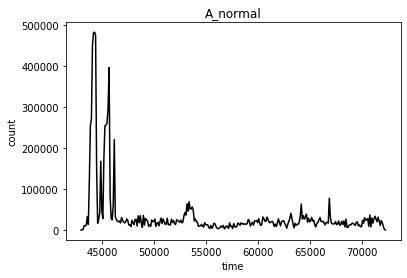

In [38]:
plt.plot(Atotal_normal_time_set,Atotal_normal_result,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.title('A_normal')
plt.show()

In [57]:
Aattack["seconds"] = round(pd.to_timedelta(Aattack["_ws.col.UTCtime"]).dt.total_seconds(), -2)
Aattack_time_set = sorted(list(set(Aattack["seconds"])))
Aattack_result = []
for i in range(len(Aattack_time_set)):
    Aattack_result.append(len(Aattack[Aattack["seconds"] == Aattack_time_set[i]]))
print(len(Aattack_result), len(Aattack_time_set))

111 111


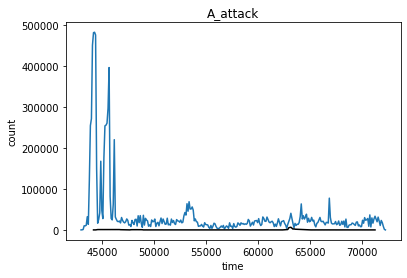

In [64]:
plt.plot(Atotal_normal_time_set,Atotal_normal_result,Aattack_time_set,Aattack_result,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.title('A_attack')
plt.show()

In [69]:
print(Aattack_result, Aattack_time_set)

[35, 47, 40, 403, 848, 858, 859, 845, 857, 842, 846, 845, 855, 855, 863, 864, 849, 860, 857, 857, 859, 855, 863, 859, 863, 859, 534, 29, 443, 535, 546, 549, 546, 555, 569, 544, 533, 538, 536, 436, 2, 22, 34, 11, 13, 23, 25, 21, 19, 15, 35, 6, 10, 12, 23, 12, 20, 5, 1, 963, 5475, 5893, 6492, 4331, 1982, 2573, 1740, 34, 8, 7, 19, 7, 20, 35, 8, 7, 19, 13, 39, 6, 8, 21, 12, 20, 33, 7, 7, 19, 14, 20, 26, 8, 1, 9, 30, 7, 16, 19, 15, 4, 10, 25, 9, 16, 4, 10, 13, 8, 9, 12, 6] [44200.0, 44300.0, 44400.0, 44500.0, 44600.0, 44700.0, 44800.0, 44900.0, 45000.0, 45100.0, 45200.0, 45300.0, 45400.0, 45500.0, 45600.0, 45700.0, 45800.0, 45900.0, 46000.0, 46100.0, 46200.0, 46300.0, 46400.0, 46500.0, 46600.0, 46700.0, 46800.0, 47700.0, 47800.0, 47900.0, 48000.0, 48100.0, 48200.0, 48300.0, 48400.0, 48500.0, 48600.0, 48700.0, 48800.0, 48900.0, 49000.0, 49200.0, 49300.0, 49400.0, 50700.0, 50800.0, 50900.0, 55700.0, 55900.0, 56000.0, 58500.0, 58600.0, 58700.0, 58800.0, 58900.0, 59100.0, 61200.0, 62300.0, 6240

Text(0.5, 0, 'time')

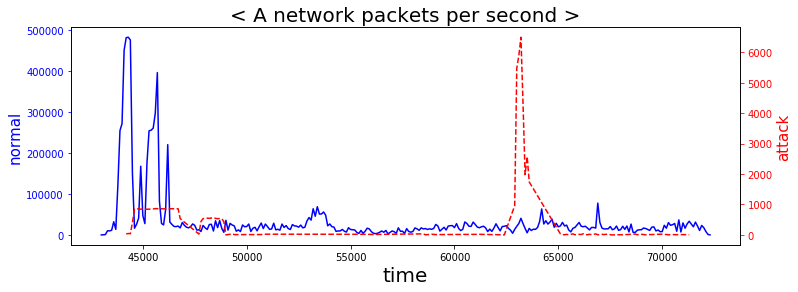

In [75]:
x1 = Atotal_normal_time_set
x2 = Aattack_time_set
y1 = Atotal_normal_result
y2 = Aattack_result

plt.figure(figsize=(12, 4))
plt.title('< A network packets per second >', fontsize=20)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

ax1.plot(x1, y1, color='blue', linestyle='-')
ax1.set_ylabel('normal', color='blue', fontsize=15)
ax1.tick_params('y', colors='blue')

ax2.plot(x2, y2, color='red', linestyle='--')
ax2.set_ylabel('attack', color='red', fontsize=15)
ax2.tick_params('y', colors='red')

ax1.set_xlabel("time", fontsize=20)

In [39]:
# B 네트워크 normal 초당 패킷 수

In [51]:
Btotal_normal["seconds"] = round(pd.to_timedelta(Btotal_normal["_ws.col.UTCtime"]).dt.total_seconds(),-2)
Btotal_normal_time_set = sorted(list(set(Btotal_normal["seconds"])))
Btotal_normal_result = []
for i in range(len(Btotal_normal_time_set)):
    Btotal_normal_result.append(len(Btotal_normal[Btotal_normal["seconds"] == Btotal_normal_time_set[i]]))
print(len(Btotal_normal_time_set), len(Btotal_normal_result))

16 16


In [52]:
Btotal_normal_time_set

[0.0,
 100.0,
 200.0,
 300.0,
 400.0,
 500.0,
 600.0,
 700.0,
 800.0,
 900.0,
 1000.0,
 1100.0,
 26900.0,
 27000.0,
 27100.0,
 27200.0]

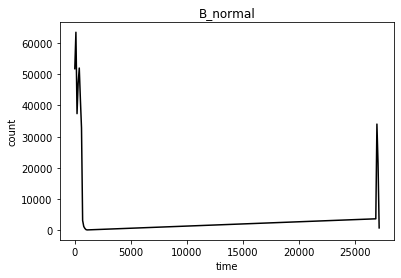

In [49]:
plt.plot(Btotal_normal_time_set,Btotal_normal_result,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.title('B_normal')
plt.show()

In [84]:
Battack["seconds"] = round(pd.to_timedelta(Battack["_ws.col.UTCtime"]).dt.total_seconds())
Battack_time_set = sorted(list(set(Battack["seconds"])))
Battack_result = []
for i in range(len(Battack_time_set)):
    Battack_result.append(len(Battack[Battack["seconds"] == Battack_time_set[i]]))
print(len(Battack_result), len(Battack_time_set))

24 24


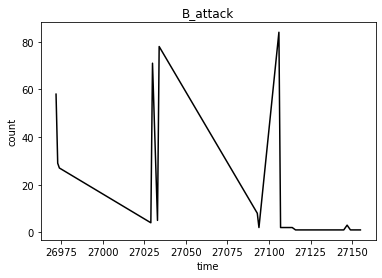

In [85]:
plt.plot(Battack_time_set,Battack_result,'k')
plt.xlabel('time')
plt.ylabel('count')
plt.title('B_attack')
plt.show()

Text(0.5, 0, 'time')

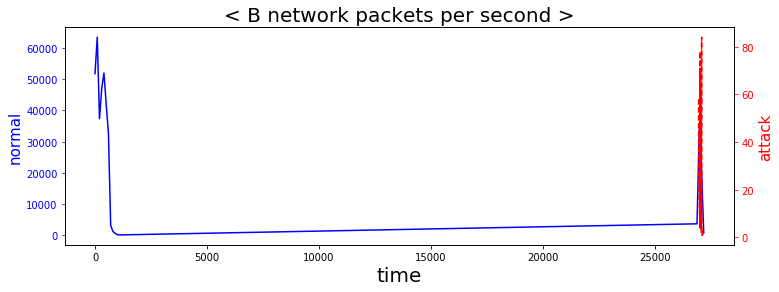

In [86]:
x1 = Btotal_normal_time_set
x2 = Battack_time_set
y1 = Btotal_normal_result
y2 = Battack_result

plt.figure(figsize=(12, 4))
plt.title('< B network packets per second >', fontsize=20)
ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

ax1.plot(x1, y1, color='blue', linestyle='-')
ax1.set_ylabel('normal', color='blue', fontsize=15)
ax1.tick_params('y', colors='blue')

ax2.plot(x2, y2, color='red', linestyle='--')
ax2.set_ylabel('attack', color='red', fontsize=15)
ax2.tick_params('y', colors='red')

ax1.set_xlabel("time", fontsize=20)

In [90]:
attack = pd.read_csv(r'D:\본선데이터셋\feature21_final\A_attack_fea19.csv',warn_bad_lines=False, error_bad_lines=False)

In [99]:
Battack = pd.read_csv(r'D:\본선데이터셋\feature21_final\B_attack_fea21.csv',warn_bad_lines=False, error_bad_lines=False)

In [89]:
normal = pd.read_csv(r'D:\본선데이터셋\feature21_final\A_total_normal_fea19.csv',warn_bad_lines=False, error_bad_lines=False)

In [91]:
attack.head()

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,label,tcp.srcport,tcp.dstport,ip.src,ip.dst,SET2_dst,SET2_src,src.num,dst.num,ratio
0,172.16.0.1_32784 192.168.10.50_80.csv,5.709501,4,5.709501,48598.984858,2.690223,5.707717,0.000869,2,1,32784,80,172.16.0.1,192.168.10.50,80172.16.0.1192.168.10.50,32784172.16.0.1192.168.10.50,2053,1,2053.0
1,172.16.0.1_32798 192.168.10.50_80.csv,5.420420,4,5.420420,48600.129776,2.554122,5.418881,0.000593,2,1,32798,80,172.16.0.1,192.168.10.50,80172.16.0.1192.168.10.50,32798172.16.0.1192.168.10.50,2053,1,2053.0
2,172.16.0.1_32802 192.168.10.50_80.csv,5.970122,4,5.970122,45570.281338,2.813208,5.968518,0.000639,2,1,32802,80,172.16.0.1,192.168.10.50,80172.16.0.1192.168.10.50,32802172.16.0.1192.168.10.50,2053,1,2053.0
3,172.16.0.1_32812 192.168.10.50_80.csv,5.126858,4,5.126858,48601.276794,2.415542,5.125045,0.000864,2,1,32812,80,172.16.0.1,192.168.10.50,80172.16.0.1192.168.10.50,32812172.16.0.1192.168.10.50,2053,1,2053.0
4,172.16.0.1_32822 192.168.10.50_80.csv,5.717089,4,5.717089,45571.407814,2.694012,5.715604,0.000681,2,1,32822,80,172.16.0.1,192.168.10.50,80172.16.0.1192.168.10.50,32822172.16.0.1192.168.10.50,2053,1,2053.0


In [92]:
normal.head()

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,label,tcp.srcport,tcp.dstport,ip.src,ip.dst,SET2_dst,SET2_src,src.num,dst.num,ratio
0,1.1.70.73_80 192.168.10.19_57627.csv,1.665280,5,1.665280,52627.408395,0.621451,1.485226,0.000192,4,0,80,57627,1.1.70.73,192.168.10.19,576271.1.70.73192.168.10.19,801.1.70.73192.168.10.19,1,11,0.090909
1,1.1.70.73_80 192.168.10.19_57628.csv,0.392698,4,0.392698,52627.876973,0.092566,0.197951,0.000004,4,0,80,57628,1.1.70.73,192.168.10.19,576281.1.70.73192.168.10.19,801.1.70.73192.168.10.19,1,11,0.090909
2,1.1.70.73_80 192.168.10.19_57629.csv,0.361616,4,0.361616,52627.845805,0.085235,0.181785,0.000004,4,0,80,57629,1.1.70.73,192.168.10.19,576291.1.70.73192.168.10.19,801.1.70.73192.168.10.19,1,11,0.090909
3,1.1.70.73_80 192.168.10.19_57630.csv,0.390453,4,0.390453,52627.875198,0.092032,0.196101,0.000002,4,0,80,57630,1.1.70.73,192.168.10.19,576301.1.70.73192.168.10.19,801.1.70.73192.168.10.19,1,11,0.090909
4,1.1.70.73_80 192.168.10.19_57631.csv,0.383270,4,0.383270,52627.867329,0.090339,0.192346,0.000001,4,0,80,57631,1.1.70.73,192.168.10.19,576311.1.70.73192.168.10.19,801.1.70.73192.168.10.19,1,11,0.090909


In [101]:
Battack.head()

,SET,fl_dur,tot_fw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,fw_pkt_s,is_in_bot,...,label,tcp.srcport,tcp.dstport,ip.src,ip.dst,SET2_dst,SET2_src,src.num,dst.num,ratio
0,157.55.39.78_4282 10.89.32.19_8080.csv,7.750375,8,7.750375,27149.957921,0.712695,1.900247,0.164574,2,0,...,1,4282,8080,157.55.39.78,10.89.32.19,8080157.55.39.7810.89.32.19,4282157.55.39.7810.89.32.19,1,1,1.0
1,207.46.13.202_11054 10.89.32.19_80.csv,31.368334,7,31.368334,27121.795540,6.479775,19.196650,0.195424,2,0,...,1,11054,80,207.46.13.202,10.89.32.19,80207.46.13.20210.89.32.19,11054207.46.13.20210.89.32.19,2,1,2.0
2,207.46.13.202_6245 10.89.32.19_80.csv,2.985825,2,2.985825,27148.899819,0.000000,2.985825,2.985825,1,0,...,1,6245,80,207.46.13.202,10.89.32.19,80207.46.13.20210.89.32.19,6245207.46.13.20210.89.32.19,2,1,2.0
3,59.23.8.26_4071 10.89.32.47_443.csv,133.569197,40,133.569197,27015.013024,12.818720,60.020763,0.000004,10,0,...,1,4071,443,59.23.8.26,10.89.32.47,44359.23.8.2610.89.32.47,407159.23.8.2610.89.32.47,12,1,12.0
4,59.23.8.26_4074 10.89.32.47_443.csv,133.589127,47,133.589127,27013.893217,11.796359,59.095276,0.000003,14,0,...,1,4074,443,59.23.8.26,10.89.32.47,44359.23.8.2610.89.32.47,407459.23.8.2610.89.32.47,12,1,12.0


In [103]:
attack['src.num'].mean()

2024.519692603266

In [104]:
attack['dst.num'].mean()

1.026897214217099

In [100]:
Battack['ratio'].value_counts()

12.0    12
2.0      2
1.0      1
Name: ratio, dtype: int64

In [102]:
attack['ratio'].mean()

2022.2323246878016

In [98]:
attack['ratio'].value_counts()

2053.000000    2049
13.000000        10
0.166667          6
8.000000          6
1026.500000       3
0.200000          2
6.500000          2
410.600000        1
1.600000          1
2.600000          1
4.000000          1
Name: ratio, dtype: int64

In [150]:
normal['ratio'].value_counts()

0.500000     20198
0.166667     13050
1.000000     12141
0.250000     11476
0.333333     10458
             ...  
0.133333         1
0.086957         1
0.054054         1
2.600000         1
10.600000        1
Name: ratio, Length: 244, dtype: int64

In [141]:
normal.columns

Index(['SET', 'fl_dur', 'tot_fw_pk', 'fw_iat_tot', 'fw_iat_avg', 'fw_iat_std',
       'fw_iat_max', 'fw_iat_min', 'fw_pkt_s', 'label', 'tcp.srcport',
       'tcp.dstport', 'ip.src', 'ip.dst', 'SET2_dst', 'SET2_src', 'src.num',
       'dst.num', 'ratio'],
      dtype='object')

In [145]:
len(normal['tcp.srcport'].unique())

170

In [146]:
len(normal['tcp.dstport'].unique())

39492

In [107]:
normal['dst.num'].mean()

121.70515837606166

In [108]:
normal.shape

(216289, 19)

In [97]:
normal['ratio'].value_counts()

0.500000     20198
0.166667     13050
1.000000     12141
0.250000     11476
0.333333     10458
             ...  
0.133333         1
0.086957         1
0.054054         1
2.600000         1
10.600000        1
Name: ratio, Length: 244, dtype: int64

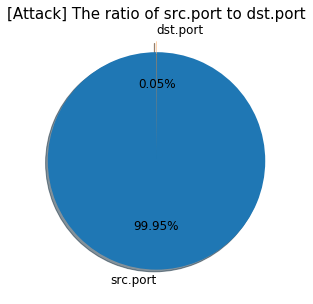

In [136]:
plt.figure(figsize=(5, 5))
labels = ['src.port', 'dst.port']
ratio = [2024.519692603266, 1.026897214217099]
plt.pie(ratio, labels=labels, shadow=True, startangle=90, autopct='%1.2f%%', explode=(0,0.1), textprops={'fontsize': 12})
plt.title('[Attack] The ratio of src.port to dst.port', fontsize=15)
plt.show()

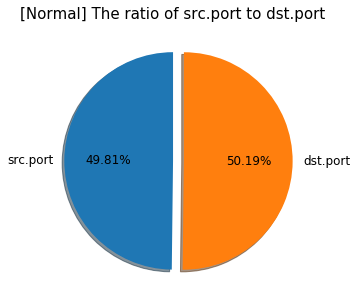

In [152]:
plt.figure(figsize=(5, 5))
labels = ['src.port', 'dst.port']
ratio = [5.0142309595032573, 5.0515837606166]
plt.pie(ratio, labels=labels, shadow=True, startangle=90, autopct='%1.2f%%', explode=(0,0.1), textprops={'fontsize': 12})
plt.title('[Normal] The ratio of src.port to dst.port', fontsize=15)
plt.show()